<a href="https://colab.research.google.com/github/whdrns2013/Workspace_SeSSAC/blob/main/pythonDir/06_deeplearning/dl_01_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 숙제
* 학습률에 대한 공부 : 정의와 의의  
* 모델에서 층을 만들 때, Dense 말고 또 무엇이 있지??
* OR, NAND, XOR 에 대한 설명 (하단 URL 있음)  
* 왜 숫자값을 원핫 인코딩으로 변환하는걸까? - 신경망 만들어보기 부분

# 숙제 - 딥러닝 모델 파라미터 관련
* 활성화 함수 종류와 그 의미 공부  https://mblogthumb-phinf.pstatic.net/MjAyMDAyMjVfOTIg/MDAxNTgyNjA4MzI2NDA5.e0VyX0yrhE5gtfPjni7IxF5kpArCeByreQsdOMB0240g.CWwTi57bPtAK6C7eLmRn1ED2RE8Lm_C6sVIwMGJS1Akg.PNG.handuelly/image.png?type=w800   
* 활성화 함수 중 softmax는 조금 다른 시각으로 봐야 할 것 같은데.. 살펴보기  
* 옵티마이저 의 개념과 종류, 각 종류별 상이점 확인 : https://heeya-stupidbutstudying.tistory.com/entry/ML-%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%97%90%EC%84%9C%EC%9D%98-Optimizer-%EC%97%AD%ED%95%A0%EA%B3%BC-%EC%A2%85%EB%A5%98
* 옵티마이저 내가 이해한 것 : 옵티마이저는.. '손실값을 최소로 하는 최적의 방법'을 찾아가는 방법론임. 여러 가지가 있으며, 딥러닝에서는 이를 선택할 수 있다.  
* 옵티마이저 중에서는 adam을 가장 보편적으로 사용한다.  


# 딥러닝 수업 전 설명  
  
* 교재 : 백견불여일타  
* 환경 : 구글 코랩  
* 사용법 : 대부분 주피터 랩과 비슷하나, 단축키 부분은 조금 다름  
* 주의사항 : 런타임 -> 런타임 유형 -> GPU는 6~8시간 사용 후 24시간 대기  
* 때문에 불필요한 GPU 세션 연결은 지양  
ddd

## 구글 코랩
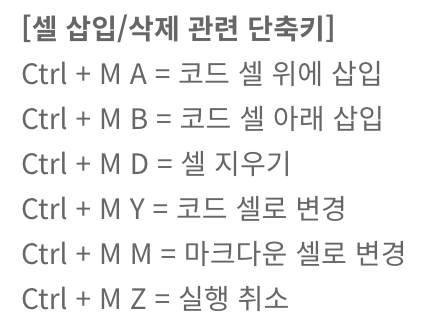

# 케라스  
  
* 파이썬 기반 머신러닝 라이브러리  
* 텐서플로우를 편하게 사용할 수 있도록 보조하는 역할  
* 텐서플로우 사용은 거의 모두 케라스를 통해 사용한다고 해도 과언이 아님  
(1) 높은 유연성  
(2) 명확한 예약어명으로 쉬운 사용  
... 등등의 장점  

In [ ]:
pwd
# 현재 디렉토리

'/content'

In [ ]:
# 판다스 임포트 해보기 = 주피터와 동일
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/칼럼 리스트.csv', encoding='cp949')

In [ ]:
data

,Unnamed: 0,0,칼럼명,칼럼 데이터타입
0,0,행정동코드,행정동코드,int64
1,1,자치구,자치구,object
2,2,행정동,행정동,object
3,3,성별,성별,int64
4,4,연령대,연령대,int64
...,...,...,...,...
138,138,배달_식재료 서비스 사용 미추정 인구수,배달_식재료 서비스 사용 미추정 인구수,int64
139,139,배달_식재료 서비스 사용일수,배달_식재료 서비스 사용일수,float64
140,140,"배달_식재료 서비스 사용일수: 4분위수, 25%","배달_식재료 서비스 사용일수: 4분위수, 25%",float64
141,141,"배달_식재료 서비스 사용일수: 4분위수, 50%","배달_식재료 서비스 사용일수: 4분위수, 50%",float64


In [ ]:
# 파이썬 버전 보기
import sys
sys.version

'3.8.16 (default, Dec  7 2022, 01:12:13) \n[GCC 7.5.0]'

In [ ]:
# 텐서플로우 임포트, 버전 보기
import tensorflow as tf
tf.__version__

'2.9.2'

# 딥러닝 개요  
  
* 딥러닝은 문제 정의 -> 데이터 준비 -> 학습, 튜닝의 반복이다.

> <b>문제 정의</b>  
> 가장 중요한 것은 문제 정의이다.  
> 어떤 문제인지, 다루는 데이터의 유형은 어떠한지 등  
> 이러한 준비들이 되어야 명확한 처리가 가능  
  
> <b>학습 하기</b>  
> 선택한 모델이 현 문제에 어울리는 모델인지  
> 손실함수와 los는 어떻게 할 것인지 등..
> 에 대한 파악 필요  
  
> <b>추론 및 평가</b>  
> 이후 학습한 모델에 대한 평가 필요  
  
## 딥러닝 용어  
> <b>데이터 준비하기</b>  
> * 클래스 불균형 : 은행 거래 사기, 희귀질병 등. 클래스간 자료 양이 불균형이 있는 경우  
> * under sampling : 과소 표집. 클래스 불균형에서 작은 쪽의 클래스의 데이터양에 양을 맞추는 것.  
> * over sampling : 과대 표집. 클래스 불균형에서 큰 쪽의 클래스의 데이터양에 맞추는 것.  
  
> <b>모델 학습</b>  
> * 분류 :  
> * 회귀 :  
> * 이진 분류 : 타겟의 범주가 두 가지인 분류의 형태 (선택은 하나)  
> * 다중 분류 : 타겟의 범주가 여러 개인 분류의 형태 (선택은 하나)  
> * 다중 레이블 분류 :  타겟의 범주가 여러개이고, 선택 또한 여러개 하는 경우.

> <b>전처리, 파라미터</b>  
> * 원핫 인코딩 : 수치형이 아닌 자료를 수치형으로 표시하는 인코딩 방법으로, 여러 개의 클래스를 각각 칼럼으로 잡은 후, 해당하면 1, 해당하지 않으면 0으로 표기하는 방법  
> * 레이블 인코딩 : 딥러닝에서는 일반적으로 레이블 인코딩은 지양한다. 레이블 인코딩시에는 모델이 인코딩 후 숫자값 크기에 영향을 받을 수 있기 때문.  
> * 하이퍼 파라미터 : 사람이 직접 설정해줘야 하는 파라미터 값. 학습률, 배치 크기, 에폭 등..  
> * 드롭아웃 : 고의로 학습데이터를 누락시키는 것. 과적합 방지를 위해 진행한다.  
  
> <b>에폭과 스텝</b>  
> * 에폭 : 전체 데이터를 사용해 학습하는 횟수. 전체 데이터를 1번 반복하면 1에폭임. 10회 반복은 10 에폭  

> <b>과대적합과 과소적합</b>  
> * 과대적합 : 훈련데이터에 너무 적합하게 모델이 만들어진 경우  
> * 과대적합은 드롭아웃 등을 통해 방지를 한다.
  
> 평가  
> * 정밀도, 정확도, F1스코어 등, 머신러닝에서 사용했던 평가 지표를 동일하게 사용한다.

## 기본 연산 해보기  
  
* 텐서플로우 : 텐서(다차원) 플로우(흐름)  - 다차원의 흐름.  
* 다차원이기 때문에 기본적으로 사용하기 어려우나,  
* 케라스의 지원을 통해 사용하기 쉬워졌음  
* 텐서플로우의 기본 자료형은 numpy의 배열 형태 (데이터타입은 다양할 수 있으나, 보통 인코딩 등을 통해 숫자로 사용함)   


In [ ]:
# 텐서플로우 임포트
import tensorflow as tf

In [ ]:
a = tf.constant(2)
print(a)
print(tf.rank(a))
# 0차원의 형태

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
b = tf.constant([1, 2])
print(tf.rank(b))
# 1차원의 형태

tf.Tensor(1, shape=(), dtype=int32)


## 신경망  

### 퍼셉트론  
![](https://heung-bae-lee.github.io/image/perceptron_basic.png)
* 신경망은 퍼셉트론 알고리즘으로부터 시작함  
* 퍼셉트론 알고리즘 : 여러 개의 입력 신호를 받아, 하나의 출력 신호로 출력하는 것.  
* x는 입력, y는 출력, w는 가중치.  
* 각각의 입력값 x들에 대해 가중치를 준 후, 활성화 함수를 통해 출력을 하거나 하지 않거나 한다.  
* 활성화함수 : 출력값을 다음으로 전달 할지 말지를 결정하는 함수로, 임계값으로 대표될 수 있다. 퍼셉트론에서 출력값이 임계값을 넘으면 전달되고, 넘지 않으면 전달되지 않는다.  
  
> <b>활성화 함수</b>  
> * 계단 함수 (step function): 단순히 0과 1을 출력하는 활성화 함수.  
  
> 인공신경망의 역사  
> https://beamandrew.github.io/deeplearning/2017/02/23/deep_learning_101_part1.html  

### 단층 퍼셉트론

In [2]:
import tensorflow as tf
tf.random.set_seed(777)
## random state와 같이 난수 생성 규칙을 정의하는 것
import numpy as np
from keras.models import Sequential # Sequential 모델
from keras.layers import Dense
from keras.optimizers import SGD # 확률적 경사하강법
from keras.losses import mse # mean squared error 평가 지표

In [ ]:
# 데이터 만들기
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0],[1],[1],[1]])


# 모델 만들기
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear'))
## Dense : 완전 연결층. 모든 입력값들에 대해 연결을 하는 층이다. / 다른 것은
## 모델에 Dense 층 1개를 만들었고, 그 층에는 1개의 유닛(=뉴런)이 있다. (Dense(1))
## input shape 들어오는 값의 형태는 2, x 행렬의 형태 
## activation 활성화 함수 = linear  


# 모델 컴파일
model.compile(optimizer = SGD(),
              loss = mse,
              metrics = ['acc'])
## 컴파일에서는 옵티마이저, 로스, 평가 모듈을 정의한다.
## 옵티마이저는 경사하강법, : 옵티마이저는.. 모델의 학습 방법을 최적화하는 방법론. 딥러닝에서는 이를 선택할 수 있다. 
## 로스 측정은 mse 방식
## 평가 지표는 acc, 정확도


# 모델 학습
model.fit(x, y, epochs = 500)
## 에폭(학습 횟수)은 500
## 이 모델은 x1 * w1 _ x2 * w1 .... 형식으로 가중치 계산이 되었다.
## 우리는 x값은 알고 있으나, 학습 과정에서 생긴 w (weight = 가중치) 값은 모른다.

In [5]:
# 가중치(weight와 편향bias 찾기)
model.get_weights()

## 결과값 :  [array([[0.49431458], [0.37552658]], dtype=float32), array([0.32719323], dtype=float32)]
## 가중치 -> 0.49431458, 0.37552658
## 편향 -> 0.32719323

[array([[0.49431458],
        [0.37552658]], dtype=float32), array([0.32719323], dtype=float32)]

In [6]:
# 각 들어오는 학습 데이터에 대해,
# 모델에서 학습한 가중치와 편향을 직접 계산해보기

## (1) [0,0] 의 경우 -> 임계값(0.5) 못넘어 0이 됨
a = (0 * 0.49431458) + (0 * 0.37552658) + 0.32719323

## (2) [0,1] 의 경우 -> 임계값 (0.5) 넘어 1이 됨
b = (0 * 0.49431458) + (1 * 0.37552658) + 0.32719323

## (3) [1, 0] 의 경우 -> 임계값 (0.5) 넘어 1이 됨
c = (1 * 0.49431458) + (0 * 0.37552658) + 0.32719323

## (4) [1, 1] 의 경우 -> 임계값 (0.5) 넘어 1이 됨
d = (1 * 0.49431458) + (1 * 0.37552658) + 0.32719323

print(a, b, c, d)

0.32719323 0.7027198100000001 0.82150781 1.19703439


In [ ]:
# OR 의 경우
# 데이터 만들기
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0],[1],[1],[1]])


# 모델 만들기
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear'))

# 모델 컴파일
model.compile(optimizer = SGD(),
              loss = mse,
              metrics = ['acc'])

# 모델 학습
model.fit(x, y, epochs = 500)

In [ ]:
model.get_weights()

In [ ]:
# NAND 의 경우
# NAND = NOT AND
# 데이터 만들기 !!!
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1],[1],[1],[0]])


# 모델 만들기
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear'))

# 모델 컴파일
model.compile(optimizer = SGD(),
              loss = mse,
              metrics = ['acc'])

# 모델 학습
model.fit(x, y, epochs = 500)

In [10]:
model.get_weights()

[array([[-0.23936202],
        [-0.36854893]], dtype=float32), array([1.0174638], dtype=float32)]

In [ ]:
# XOR 의 경우
# exclusive or
# 데이터 만들기 !!!
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0],[1],[1],[0]])


# 모델 만들기
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear'))

# 모델 컴파일
model.compile(optimizer = SGD(),
              loss = mse,
              metrics = ['acc'])

# 모델 학습
model.fit(x, y, epochs = 500)
## 에폭(학습 횟수)은 500
## -> 정확도가 0.75가 나옴

model.fit(x, y, epochs = 1000)
## 학습 횟수를 늘렸으나, 정확도가 더욱 떨어짐 (0.5)
## 즉, 학습 횟수를 늘린다고 해서 정확도가 올라가지 않음
## 단층 퍼셉트론에서는 이와 같이 XOR에 대한 문제를 해결하지 못함

In [13]:
model.get_weights()

[array([[-0.0844735 ],
        [-0.07863908]], dtype=float32), array([0.5967371], dtype=float32)]

OR, NAND, XOR 에 대한 설명

https://seahahn.tistory.com/96

### 다층 퍼셉트론

위에서 실습했다시피, XOR 논리에 대해서는 학습 정확도가 떨어지며,  
학습 횟수를 늘린다고 해서 해결되지 않음을 알 수 있었다.  

이 때문에 1900년대 중반 인공신경망의 연구는 암흑기를 맞이했다.  
  
이후 layer를 여러 개로 주는 '다층 퍼셉트론' 기술이 대두되었으며,  
이 다층 퍼셉트론이 현재 딥러닝의 기본 바탕이 된다.  

![](https://blog.kakaocdn.net/dn/HejKz/btqCGQT8Dm7/WUKnuEVqBKR4bQjvc1V7h1/img.png)  
> input층은 데이터 들어오는 층, 앞서 만들어준 Dense층은 hidden layer에 해당, 이후 활성화 함수를 통해 output layer를 통해 출력된다.  


* 다층 퍼셉트론 참고  
아래 영상을 참고하면, 다층 퍼셉트론의 프로세스를 이해하기 쉽다.  
https://www.youtube.com/watch?v=aircAruvnKk

In [80]:
import tensorflow as tf
tf.random.set_seed(777)
## random state와 같이 난수 생성 규칙을 정의하는 것
import numpy as np
from keras.models import Sequential # Sequential 모델
from keras.layers import Dense
from keras.optimizers import SGD # 확률적 경사하강법
from keras.optimizers import RMSprop
from keras.losses import mse # mean squared error 평가 지표

In [ ]:
# XOR 문제
# 데이터 만들기 (위 단층 퍼셉트론과 동일)
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0],[1],[1],[0]])


# 모델 만들기
model = Sequential()
model.add(Dense(32, input_shape=(2,), activation = 'relu'))
## 32개의 유닛(=뉴런)이 있는 Dense 완전 연결층을 1개 만들고
model.add(Dense(1, activation = 'sigmoid'))
## 1개의 출력 유닛(=뉴런)이 있는 Dense 완전 연결층을 1개 만들었다. (총 2개 = 다층 퍼셉트론)

# 모델 컴파일
model.compile(optimizer = RMSprop(),
              loss = mse,
              metrics = ['acc'])

# 모델 학습
model.fit(x, y, epochs = 500)
##초반에는 학습률이 떨어졌지만, 이후 갈수록 1에 가까워짐

In [ ]:
# 가중치와 편향값 확인
model.get_weights()
## 확인시, 32개 + 32개의 가중치값, 32개의 bias 값을 확인할 수 있다.

In [ ]:
# x에 대한 모델 예측값 확인
model.predict(x)

### 활성화 함수  
  
(1) 시그모이드 함수 : 0 ~ 1 사이의 값으로 출력(뒤로 전달) 됨  
(2) 하이퍼볼릭 탄젠트 : -1 ~ 1 사이의 값으로 출력(뒤로 전달) 됨  
(3) Relu : 0 이하의 값은 모두 0으로, 0 이상은 들어오는 값 그대로 출력(뒤로 전달) 됨  
  
![](https://mblogthumb-phinf.pstatic.net/MjAyMDAyMjVfMjI4/MDAxNTgyNjA3MjY0NzIy.tR76IK8YsIL8XORjYDJoMSNBK2nhpUooUhMS6N0d1NUg.bMGce-shmpX6--ck-mvfcTimMjL3UpFw2iSgQgExCR8g.PNG.handuelly/image.png?type=w800)  
![](https://mblogthumb-phinf.pstatic.net/MjAyMDAyMjVfOSAg/MDAxNTgyNjA3Njg0NDc0.3PxflDp1EDXZVSsOwpBBYUXQP9GLJmPTqz872JMxkc4g.QlUM1zGGT9WK9b7jcLQwhXTAr3Tqp4k2RZuCeidUTOIg.PNG.handuelly/image.png?type=w800)
![](https://mblogthumb-phinf.pstatic.net/MjAyMDAyMjVfOTIg/MDAxNTgyNjA4MzI2NDA5.e0VyX0yrhE5gtfPjni7IxF5kpArCeByreQsdOMB0240g.CWwTi57bPtAK6C7eLmRn1ED2RE8Lm_C6sVIwMGJS1Akg.PNG.handuelly/image.png?type=w800)

* 참고 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=handuelly&logNo=221824080339

## 신경망 만들어보기  
  
* 이번에는 다층 퍼셉트론 모양의 손글씨 판단 모델을 만들어볼 것이다.  
* 사용하는 데이터셋은 mnis 데이터셋으로, 총 7만개 데이터, 각 데이터는 28*28의 행렬 형태이다.  

In [58]:
from keras.datasets.mnist import load_data   # 손글씨 데이터셋
import matplotlib.pyplot as plt 
import numpy as np

In [59]:
load_data() # mnis 데이터. 이번에 다룰 mnis 데이터는 튜플 형태이다.
(x_train, y_train), (x_test, y_test) = load_data()

In [60]:
# 데이터셋 살펴보기
print('트레인셋 : ', x_train.shape) # 60,000개 / 28*28 행렬
print('테스트셋 : ', x_test.shape) # 10,000개 / 28*28 행렬

print('트레인셋 살피기', x_train[:5])
print('y값 살피기 : ', y_train[:5])

트레인셋 :  (60000, 28, 28)
테스트셋 :  (10000, 28, 28)
트레인셋 살피기 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
y값 살피기 :  [5 0 4 1 9]


In [61]:
# 샘플 추출 index 만들어주기 (총 60,000개 중 추출할 샘플)
sample_size = 3
random_idx = np.random.randint(60000, size = sample_size)  # 0~ 69,999 사이의 정수를 인덱스값으로 무작위 배정한 후, 3개 선택
random_idx

array([59951, 41869, 25398])

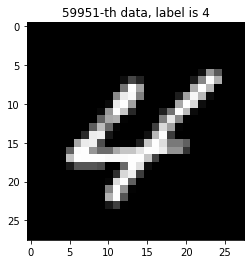

0 255


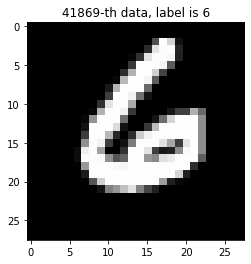

0 255


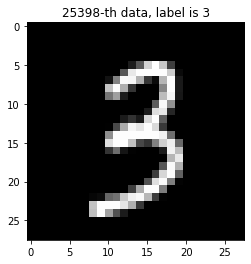

0 255


In [62]:
# 랜덤 선택된 이미지들 살펴보기
for idx in random_idx:
  img = x_train[idx,:] # 6만개의 train 셋 중, 3개 추출하고, 28*28 사이즈 그대로 가져온다.
  label = y_train[idx] # 선택된 x에 대한 답안인 y를 가져온다.
  plt.imshow(img, cmap='gray')
  plt.title(f'{idx}-th data, label is {label}') # 시각화하는데, 인덱스 번호와 정답값 label을 제목으로 가져온다.
  plt.show()

  # 데이터셋 중 하나의 값 임의로 선택해서
  # min값과 max값 살펴보기 = 회색조로 잘 되었는지, 아니면 rgb값으로 되어있는지 확인
  print(x_train[0].min(), x_train[0].max())

In [63]:
# 트레인셋을 훈련 - 검증 데이터 셋으로 분리 (7:3)
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3,
                                                  random_state = 777)

# 분리된 데이터셋 확인
print(x_train.shape, y_train.shape)

(42000, 28, 28) (42000,)


In [64]:
# 트레인셋, 검증셋 1차원으로 변환 전처리
x_train = (x_train.reshape((-1,28*28)))/255
x_val = (x_val.reshape((-1,28*28)))/255
x_test = (x_test.reshape((-1,28*28)))/255

In [65]:
# 변환 전처리 후 shape 살펴보기
print('reshape 후의 트레인셋 모양 : ', x_train.shape)
print('reshape 후의 검증셋 모양 : ', x_test.shape)
print('트레인셋의 최대값, 최소값 : ', x_train.min(), x_train.max()) # 최대 1, 최소 0
# print('검증셋의 최대값, 최소값 : ', x_val.min(), y_val.max()) # 최대 1, 최소 0

reshape 후의 트레인셋 모양 :  (42000, 784)
reshape 후의 검증셋 모양 :  (10000, 784)
트레인셋의 최대값, 최소값 :  0.0 1.0


In [66]:
# y값의 인코딩
# 1, 2, 3, 4, 5.... 형식이기 때문에 y값을 그대로 써도 되지만
# 보통은 원 핫 인코딩으로 변환 후 진행한다. 왜???

from keras.utils import to_categorical # categorical : 범주형을 인코딩해주는 모듈

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print('y_train : ', y_train, 'y_test : ', y_test)

y_train :  [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] y_test :  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [67]:
from keras.models import Sequential # 시퀀셜 모델 모듈 불러오고
from keras.layers import Dense # 덴스(완결 연결층) 생성 모듈 불러오고

In [68]:
# 모델 생성

model = Sequential() # 시퀀셜 모델 만들어주고
model.add(Dense(64, input_shape = (784,), activation = 'relu'))
# 64개의 유닛이 있는 중간층을 만들어준다. (각 유닛은 784개의 입력값을 받는다.)
# 가장 첫 번째 층에서는 꼭 input_shape을 적어줘야 한다. (데이터가 어떻게 들어오는지)

model.add(Dense(32, activation = 'relu'))
# 32개의 유닛이 있는 중간층을 추가해 만들어준다.
# 중간에 있는 층은 input / outout shape를 적어주지 않아도 된다.

model.add(Dense(10, activation = 'softmax'))
# 유닛의 수는 10개로 해준다. == 정닶값 y 데이터셋을 원핫인코딩으로 10*n의 행렬로 변환해줬기 때문 
# softmax : 출력값의 전체 합이 1(=100%)이 되는 활성화 함수  ; 추가 공부 필요
# 소프트맥스 함수는 다른 활성화 함수와는 조금 다르게 바라봐야 할 필요가 있을 것 같다... ; 추가 공부 필요

In [69]:
# 컴파일  
model.compile(optimizer = 'adam',  # 옵티마이저는 아담으로. 아담이 뭘까?
              loss = 'categorical_crossentropy',  # 로스값은 카테고리컬 크로스엔트로피로
              metrics = ['acc'])  # 평가는 정확도로

# 학습
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size = 128,
                    validation_data=(x_val, y_val))
## 전체 학습 데이터를 30번 돌릴 것인데.. (ephchs)
## ????(batch_size)
## 검증 데이터는 x_val, y_val

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4785 - acc: 0.8623 - val_loss: 0.2484 - val_acc: 0.9292
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2154 - acc: 0.9380 - val_loss: 0.1946 - val_acc: 0.9443
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1661 - acc: 0.9515 - val_loss: 0.1685 - val_acc: 0.9520
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1357 - acc: 0.9600 - val_loss: 0.1470 - val_acc: 0.9562
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1144 - acc: 0.9669 - val_loss: 0.1397 - val_acc: 0.9587
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0991 - acc: 0.9714 - val_loss: 0.1293 - val_acc: 0.9604
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.0867 - acc: 0.9750 - val_loss: 0.1181 - val_acc: 0.9643
Epoch 8/30
329/329 [==============================] - 2s 5ms/step - loss: 0.

In [70]:
# 앞서 학습된 모델의 history에서 출력할 수 있는 값들은?
# dictionary 형태로 저장되어있고
# loss, acc, val_loss, cal_acc 값이 저장되어있다.
print('history에는 무엇무엇이 저장되어 있을까? : ', history.history.keys())

history에는 무엇무엇이 저장되어 있을까? :  dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


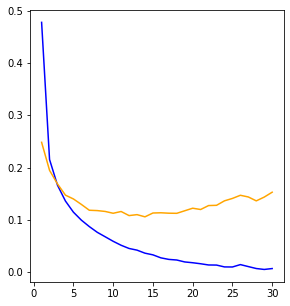

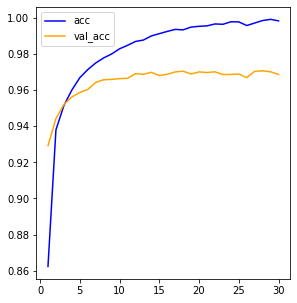

In [71]:
# 학습 횟수에 따른 각 지표들의 추이 살펴보기 (그래프로)

## 변수들 설정
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
accs = his_dict['acc']
val_accs = his_dict['val_acc']
epochs = range(1, len(loss) + 1) # 학습 횟수. x 축이 된다.

## 그래프 그리기 (1) : loss - val_loss 살펴보기
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1, 2, 1)  # 2행 1열중 첫 번째 그래프
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss,color='orange', label='val_loss')
### 해석 : 학습(훈련) loss는 계속해서 내려간다 : 그럴 수 밖에 없음 > 같은 데이터를 반복 학습하기 때문
### 해석 : 검증 loss는 감소하다가 증가함 > 증가 = 모델이 학습(훈련) 데이터에 과적합되었음을 알 수 있음

## 그래프 그리기 (2) : acc 살펴보기
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1, 2, 2)  # 2행 1열중 두 번째 그래프
ax1.plot(epochs, accs, color='blue', label='acc')
ax1.plot(epochs, val_accs,color='orange', label='val_acc')
ax1.legend()
### 해석 : 학습(훈련) acc는 지속 올라가지만, 검증 acc는 증가하다가 보합세를 보인다.
### 학습 acc는 올라가지만 검증 acc는 보합세면 -> 과대적합 우려

In [72]:
# 모델 평가

model.evaluate(x_test, y_test) # 문제(x)와 답안(y)를 넣어줌.
## 결과값 = loss: 0.1329 - acc: 0.9723
## 정확도 0.9723 으로 꽤 높은 정확도

313/313 [==============================] - 1s 2ms/step - loss: 0.1492 - acc: 0.9699


[0.14919409155845642, 0.9699000120162964]

In [73]:
# 테스트셋에 대한 결과값 살펴보기
result = model.predict(x_test)
print('결과값 형태 : ', result.shape)
## 이는 10000, 10 의 형태인데..
## -> 테스트 데이터가 10,000개였고, 원핫인코딩으로 칼럼이 10개로 분할됨


# 결과값 하나만 살펴보면
print('결과값 하나만 보기(10개의 답안 중 각각 에 대한 선택율) : ', result[0])
print('결과값 하나만 보기(선택율을 반올림) : ', np.round(result[0],2))
print('결과값 하나만 보기(선택율이 가장 높은 값은?) : ', np.argmax(result[0])) # argmax : 배열에서 가장 큰 값이 있는 열의 index 값을 반환

313/313 [==============================] - 1s 2ms/step
결과값 형태 :  (10000, 10)
결과값 하나만 보기(10개의 답안 중 각각 에 대한 선택율) :  [2.78815029e-16 7.20946587e-15 1.40222495e-11 1.96156989e-07
 1.36037348e-20 1.43458582e-14 5.24226282e-30 9.99999702e-01
 2.34867193e-13 2.73012027e-13]
결과값 하나만 보기(선택율을 반올림) :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
결과값 하나만 보기(선택율이 가장 높은 값은?) :  7


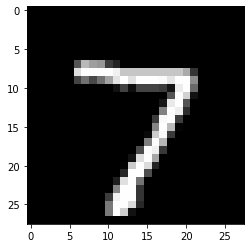

In [74]:
# 결과값을 그래프로 찍어보기
plt.imshow(x_test[0].reshape(28,28), cmap='gray') # 7이 나옴

1/1 [==============================] - 0s 20ms/step
예측값 :  3


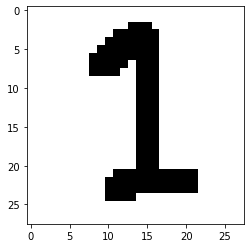

1/1 [==============================] - 0s 18ms/step
예측값 :  3


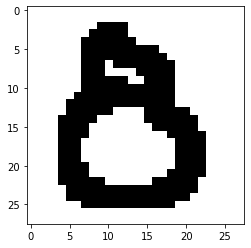

1/1 [==============================] - 0s 20ms/step
예측값 :  9


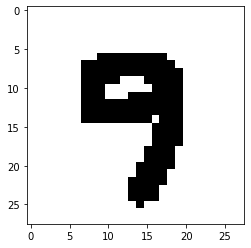

1/1 [==============================] - 0s 26ms/step
예측값 :  5


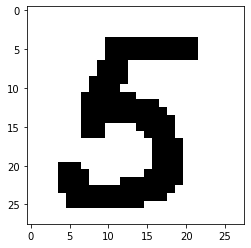

1/1 [==============================] - 0s 23ms/step
예측값 :  3


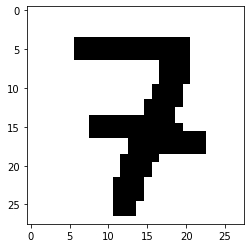

1/1 [==============================] - 0s 17ms/step
예측값 :  2


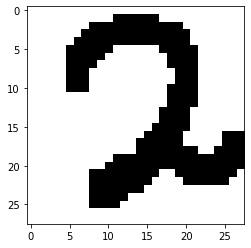

1/1 [==============================] - 0s 18ms/step
예측값 :  9


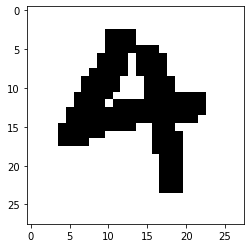

1/1 [==============================] - 0s 17ms/step
예측값 :  3


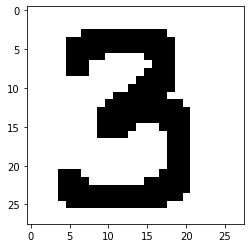

1/1 [==============================] - 0s 16ms/step
예측값 :  1


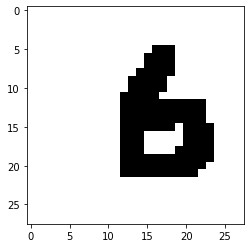

1/1 [==============================] - 0s 17ms/step
예측값 :  9


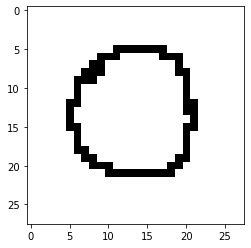

In [75]:
# 그러면.. 이전에 만들었던 내 손글씨 이미지를 불러와, 모델이 어떤 숫자로 인식할지 테스트해보자
# @ 솔형님 : 0~9 숫자를 그림판으로 그려주세요
# @ 솔형님 : 이때, 이미지 크기는 28 * 28이어야 합니다!
# @ 솔형님 : 이후, 구글드라이브에 올려준 후
# @ 솔형님 : 아래쪽 glob.glob(경로명) 경로명 안에 이미지 올라간 경로 올려주시면 됩니다.
# @ 솔형님 : *.확장자 -> '확장자명에 해당하는 모든 파일' 이라는 뜻입니다.

from PIL import Image
import glob

pred_list = []

for path in glob.glob('/content/drive/MyDrive/Colab Notebooks/data/img/*.bmp'):
    img = Image.open(path).convert('L') # L : 흑백 / L 삭제하면 기본값인 RGB로 표현됨
    plt.imshow(img, cmap='gray')

    img = np.resize(img, (1, 784))      # 1, 784 형태의 array로 바꿈
    img = 255.0 - (img)                   # 색상 반전
    pred = model.predict(img)       # 모델을 통해 예측함
    print('예측값 : ', np.argmax(pred))
    
    pred_list.append(pred)
    plt.show()


In [76]:
# 학습시킨 모델 저장과 불러오기

## 모델 저장
model.save('mnist.h5') #확장자가 h5이다.

## 모델 불러오기
from keras.models import load_model
new_model = load_model('mnist.h5')

## 불러온 모델 이용해 예측하기
np.argmax(new_model.predict(x_test)[0])
print(x_test[0])

313/313 [==============================] - 1s 2ms/step
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 

In [77]:
# 학습시킨 모델의 weight(가중치)값 저장과 불러오기

## 가중치 값 저장
model.save_weights('mnist')

## 저장된 가중치 값을 적용시킬 모델 생성하기
model1 = Sequential()
model1.add(Dense(64, input_shape = (784,), activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))

## 가중치 값 불러와 새로운 모델에 적용시키기
model1.load_weights('mnist')

## 불러온 모델 이용해 예측하기
np.argmax(model1.predict(x_test)[0])
print(x_test[0])

313/313 [==============================] - 1s 1ms/step


7

## 위 학습 모델의 의의

* 위 학습 모델은 '가중치'를 학습했다는 것에 의의가 있다.  
* '모델 = 가중치 주는 방식' 과 같다고 봐도 되겠다.  